### Data Dictionary => Understanding the data from CSV

<p>
	<ul>
        <li>- instant: record index ===> <b> </li>      
        <li>- dteday : date ===> <b> Date Obj</li> 
	 <li>- season : season (1:spring, 2:summer, 3:fall, 4:winter) ===> <b> Categorical Variables</li> 
	 <li>- yr : year (0: 2018, 1:2019) ===> <b>Categorical Variables</li>
	 <li>- mnth : month ( 1 to 12) ===> <b>Categorical Variable</li>
	 <li>- holiday :  holiday is 0 ,working is 1. ===> <b>Categorical Variable</li>
	 <li>- weekday : day of the week  ===> <b>Categorical Variable </li>
	 <li>- workingday : working => 1,holiday => 0. ===> <b>Categorical Variable</li>
	 <li>+ weathersit : ===> <b>Categorical Variable
		<ul>
            <li>- 1: Clear, Few clouds, Partly cloudy, Partly cloudy</li>
		<li>- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
		<li>- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
           <li> - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li></ul></li>
	 <li>- temp : temperature in Celsius ===> <b>Numerical Variable</li>
	 <li>- atemp: feeling temperature in Celsius ===> <b>Numerical Variable </li>
	 <li>- hum: humidity ===> <b>Numerical Variable </li>
	 <li>- windspeed: wind speed ===> <b>Numerical Variable </li>
	 <li>- casual: count of casual users ===> <b>Numerical Variable</li>
	 <li>- registered: count of registered users ===> <b>Numerical Variable </li>
	 <li>- cnt: count of total rental bikes including both casual and registered ===> <b>Numerical Variable</li></ul></p>

### Step I => Reading and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import math


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for Data Quality Issues - EDA

In [7]:
# Checking for Missing Values

for col in df:
    print(df[col].isnull().value_counts())

# Observation==> Row Count is 730 and each and every column False count is 730 , So there is no missing Data.

False    730
Name: instant, dtype: int64
False    730
Name: dteday, dtype: int64
False    730
Name: season, dtype: int64
False    730
Name: yr, dtype: int64
False    730
Name: mnth, dtype: int64
False    730
Name: holiday, dtype: int64
False    730
Name: weekday, dtype: int64
False    730
Name: workingday, dtype: int64
False    730
Name: weathersit, dtype: int64
False    730
Name: temp, dtype: int64
False    730
Name: atemp, dtype: int64
False    730
Name: hum, dtype: int64
False    730
Name: windspeed, dtype: int64
False    730
Name: casual, dtype: int64
False    730
Name: registered, dtype: int64
False    730
Name: cnt, dtype: int64


In [8]:
# Checking for Bad Data

for col in df:
    print(df[col].value_counts(ascending=False))
    print("Unique Values===> for Column '",col,"' ===>",df[col].unique())
    
# Observation => After reading below result ,It appears that data is in Good shape and does not have bad data.

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64
Unique Values===> for Column ' instant ' ===> [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 20

Unique Values===> for Column ' atemp ' ===> [18.18125  17.68695   9.47025  10.6061   11.4635   11.66045  10.44195
  8.1127    5.80875   7.5444    9.5732    8.02365   7.54415   9.42065
 12.4056   11.71085   8.83855  11.61665  14.9211   12.7525    7.89165
  3.95348   4.941955  5.8965   11.7263   10.18     10.985    11.16585
 10.6063   12.5161    9.3125   11.7265   12.72085   8.8939   11.42935
 12.1529   14.58355  15.1829    9.9123    7.21415   7.4774   10.67545
 11.6477   16.20565  19.9175   12.7137   15.81     21.4329   25.59915
 19.5702   13.8665   14.20375   9.30165  12.28585  14.45955  17.52305
 14.1096   17.55545  20.0059   13.19395  16.00355  10.00665  12.78395
 18.93895  18.3126   11.92305  15.12     14.3304   19.2834   15.25
 16.2875   19.00455  16.6      15.9089   18.3465   20.51665  26.35045
 23.32625  20.48675  22.0321   16.89695  13.54165  12.8156   12.87855
 12.51695  12.8787   14.6454   14.8675   12.87875  14.1727   15.78185
 18.93835  27.14645  19.3804   21.6848   16.22395

In [9]:
# Checking for Duplicates

df.drop_duplicates(inplace=True)
df.shape

# Observation => There where no duplicates in the Data.

(730, 16)

In [10]:
# Remove Redundunt Columns

df.drop('instant',axis=1,inplace=True)# ==> Dropping this Variable as it is only a numbered index
df.drop('dteday',axis=1,inplace=True)# ==> we have montha and year in sepearate columns , So no need of this variable


<Axes: >

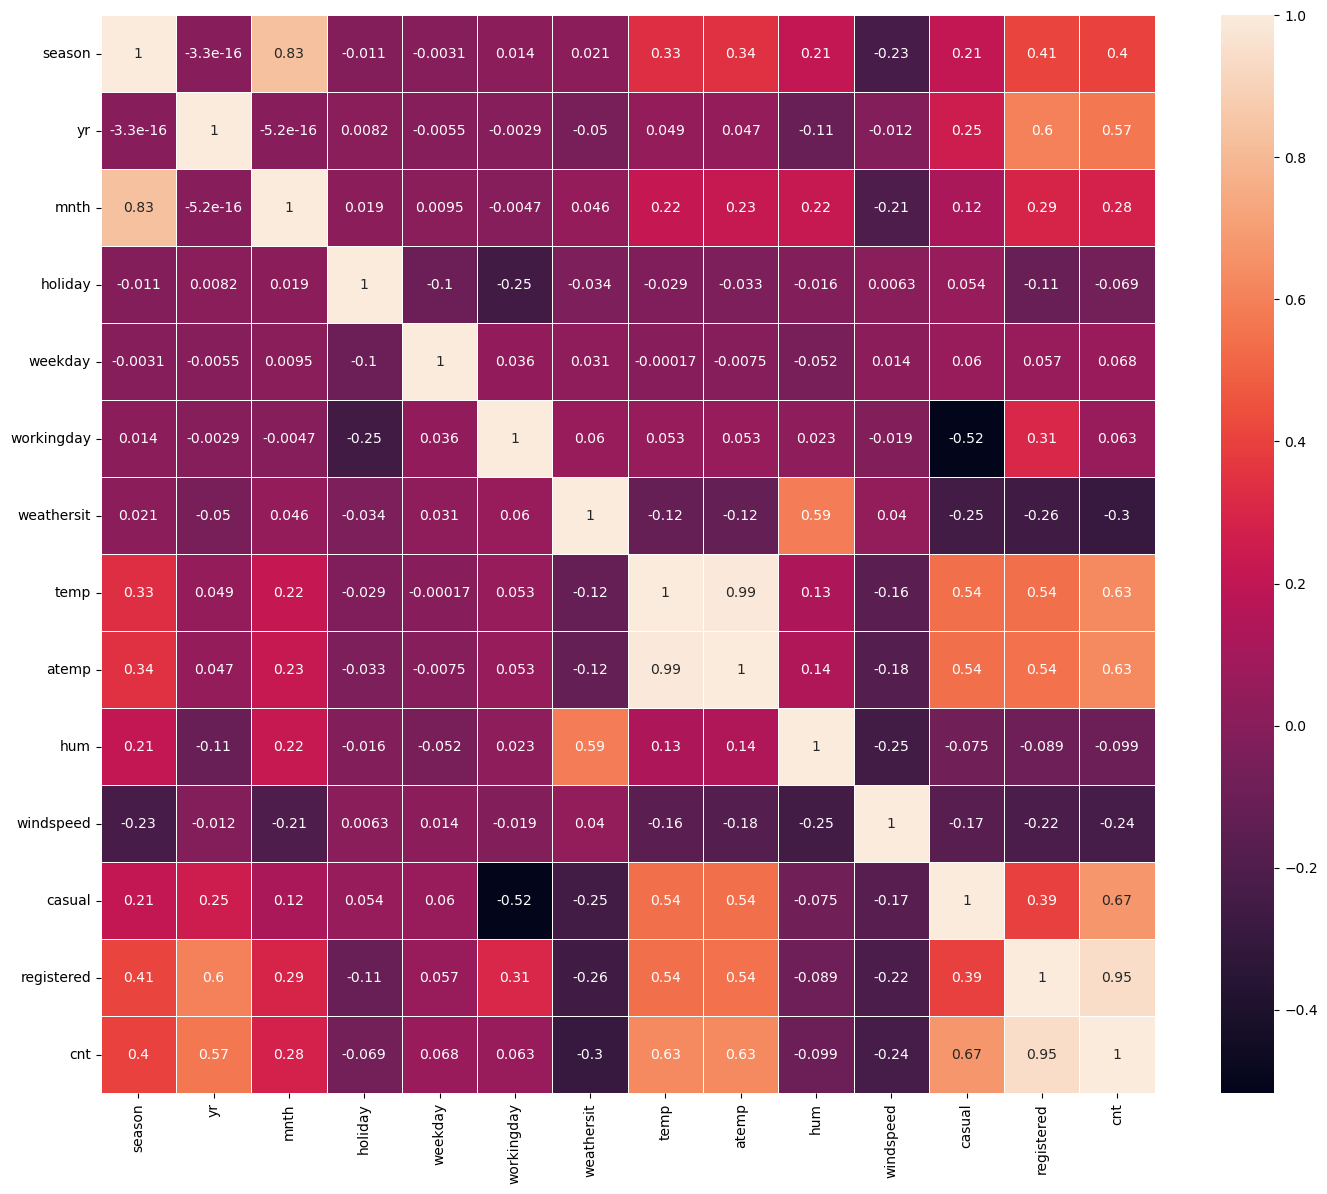

In [11]:
fig,ax = plt.subplots(figsize=(17,14))         # Sample figsize in inches
sns.heatmap(df.corr(),annot=True, linewidths=.4, ax=ax)


In [12]:
# Correlation Between temp and atemp is 0.99, Hence Droping it.
df.drop('atemp',axis=1,inplace=True)
df.drop('casual',axis=1,inplace=True)# ==> This variable is an redundant variable .This is not help us as our agenda is to undersatnd CNT and not how we get CNT from Casual Variables
df.drop('registered',axis=1,inplace=True)#  ==> This variable is an redundant variable .This is not help us as our agenda is to undersatnd CNT and not how we get CNT from Registered Variables

In [13]:
### Getting Numerical Variables

num_var=["cnt","hum","windspeed","temp"]
df_num=df[num_var]

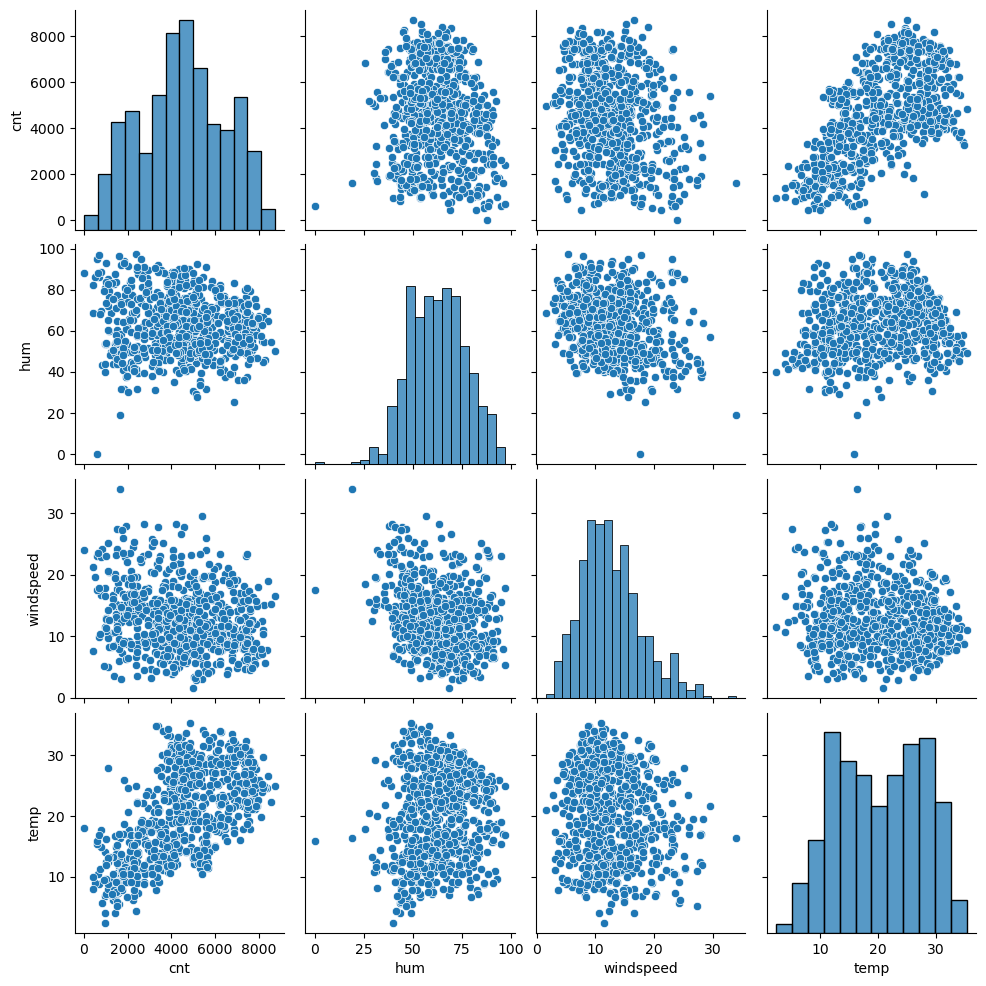

In [14]:
sns.pairplot(df_num)
plt.show()

### Visualising based on Categorical Variables ===> Box Plot

1.season
2.yr
3.mnth
4.holiday
5.weekday
6.workingday
7.weathersit


<Axes: xlabel='season', ylabel='cnt'>

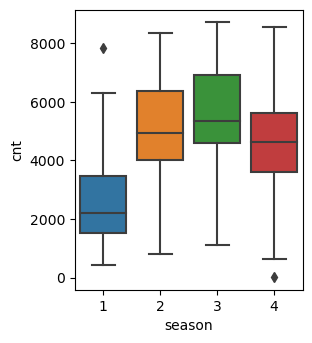

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=df)

<Axes: xlabel='yr', ylabel='cnt'>

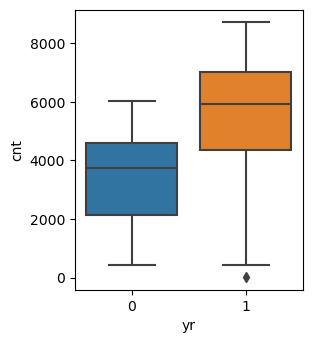

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="yr",y="cnt",data=df)

<Axes: xlabel='mnth', ylabel='cnt'>

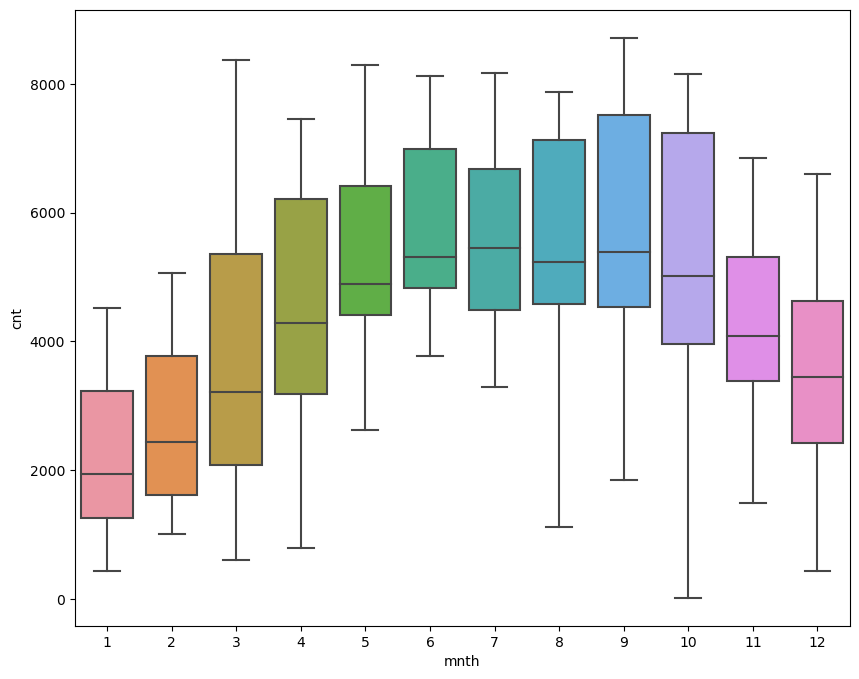

In [17]:
plt.figure(figsize=(10,8))
#plt.subplot(1,2,2)
sns.boxplot(x="mnth",y="cnt",data=df)

<Axes: xlabel='holiday', ylabel='cnt'>

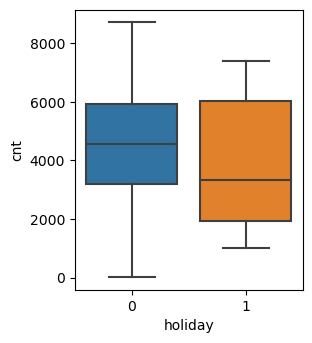

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="holiday",y="cnt",data=df)


<Axes: xlabel='weekday', ylabel='cnt'>

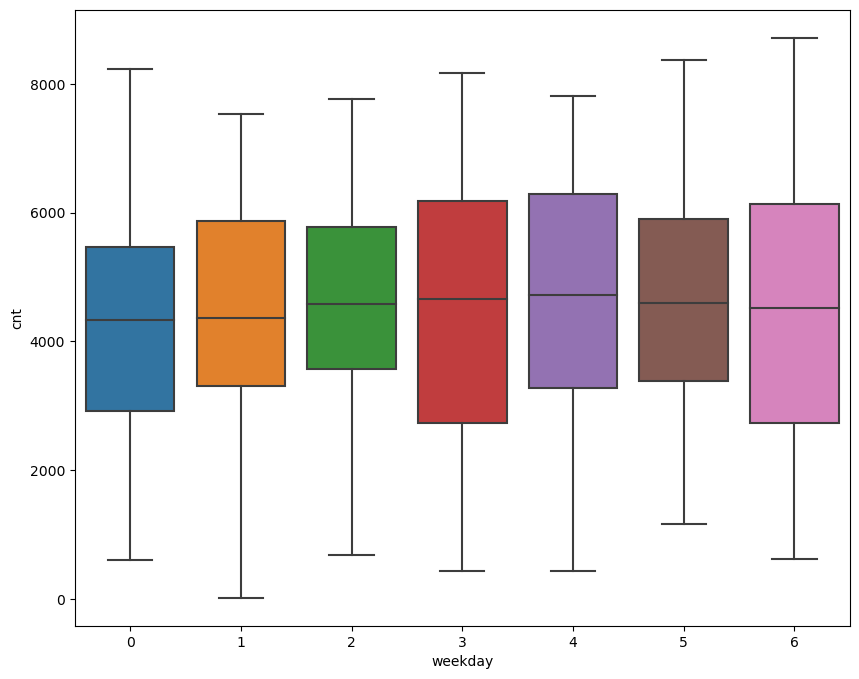

In [19]:
plt.figure(figsize=(10,8))
#plt.subplot(2,3,1)
sns.boxplot(x="weekday",y="cnt",data=df)

<Axes: xlabel='workingday', ylabel='cnt'>

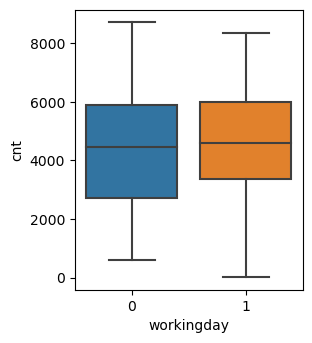

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="workingday",y="cnt",data=df)

<Axes: xlabel='weathersit', ylabel='cnt'>

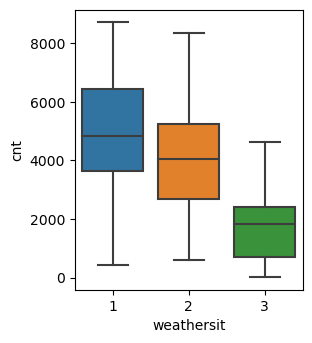

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="weathersit",y="cnt",data=df)

### Inferences:-

#### 1.The demand of bike is less in the month of spring when compared with other seasons
#### 2.The demand bike increased in the year 2019 when compared with year 2018.
#### 3.Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
#### 4. Bike demand is less in holidays in comparison to not being holiday.
#### 5. The demand of bike is almost similar throughout the weekdays.
#### 6.There is no significant change in bike demand with working day and non-working day.
#### 7. The bike demand is high when weather is clear and few clouds however demand is less in case of Light-snow and light-rainfall. We do not have any data for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog so we cannot derive any conclusion. May be the company is not operating on those days or there is no demand of bike


<h3><font color="red"> Since some Independent variables are positively correlated with CNT - We should go ahead with Linear Correlation <font color="green" Assumption 1 passed => Some Linear Relationship between independent and Target Variable  </h3>

### Step 2 ===> Data Preparation ==> Dummy Variables
1.season
2.yr
3.mnth
4.holiday
5.weekday
6.workingday
7.weathersit

In [22]:
weathersit_status = pd.get_dummies(df['weathersit'],drop_first=True)
weathersit_status.rename(columns={2:'weathersit_2',3:'weathersit_3'},inplace=True)
weathersit_status
df=pd.concat([df,weathersit_status],axis=1)
df.drop('weathersit',axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3
0,1,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0


In [23]:
season_status = pd.get_dummies(df['season'],drop_first=True)
season_status.rename(columns={2:'season_2',3:'season_3',4:'season_4'},inplace=True)
season_status
df=pd.concat([df,season_status],axis=1)
df.drop('season',axis=1,inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [24]:
weekday_status = pd.get_dummies(df['weekday'],drop_first=True)

weekday_status.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
df=pd.concat([df,weekday_status],axis=1)
df.drop('weekday',axis=1,inplace=True)
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,1,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0


In [25]:
mnth_status = pd.get_dummies(df['mnth'],drop_first=True)
mnth_status.rename(columns={2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df=pd.concat([df,mnth_status],axis=1)
df.drop('mnth',axis=1,inplace=True)
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'weathersit_2', 'weathersit_3', 'season_2', 'season_3', 'season_4',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object')

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [26]:
df.shape

(730, 29)

### Step 3 => Test -Train -Scaling 

In [27]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [28]:
#Scaling
scaler=MinMaxScaler()
num_vars=["cnt","hum","windspeed","temp"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
print(df_train[num_vars].describe())
df_train.head()


              cnt         hum   windspeed        temp
count  510.000000  510.000000  510.000000  510.000000
mean     0.513499    0.650480    0.320883    0.537440
std      0.224421    0.145846    0.169803    0.225858
min      0.000000    0.000000    0.000000    0.000000
25%      0.356420    0.538643    0.199179    0.339853
50%      0.518638    0.653714    0.296763    0.542596
75%      0.684710    0.754830    0.414447    0.735215
max      1.000000    1.000000    1.000000    1.000000


,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,...,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,1,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,1,...,0,1,0,0,0,0,0,0,0,0


### RFE +  Manual Feature Elimination Approach

In [29]:
y_train=df_train.pop('cnt')
X_train=df_train


### RFE


In [30]:
lm= LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col=X_train.columns[rfe.support_]

In [31]:
col # Variables selected by RFE

# I worked on 2 machines and for some reason RFE gave different results on both the machines , that is why I have hard coded the RFE selection when I was evaluating the model

col=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'weathersit_3', 'season_2', 'season_4', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Sep']


In [32]:
X_train.columns[~rfe.support_] #Variables Dropped by RFE

Index(['weathersit_2', 'season_3', 'Saturday', 'Feb', 'Mar', 'Apr', 'May',
       'June', 'July', 'Aug', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [33]:
# Training the model Iteration 1

X_train_rfe_col=X_train[col]

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.91e-181
Time:                        10:17:13   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

In [34]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
1,holiday,inf
2,workingday,inf
9,Monday,inf
10,Tuesday,inf
11,Wednesday,inf
12,Thursday,inf
13,Friday,inf
4,hum,10.96
3,temp,7.20
5,windspeed,3.59


In [35]:
X_train_rfe_col.drop('Friday',axis=1,inplace=True)

# Dropping of Friday Due to High p-value:-  0.873 

In [36]:
# Iteration 2 =>

X_train_rfe_2nd_iteration=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe_2nd_iteration).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.91e-181
Time:                        10:17:13   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

In [37]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
4,hum,10.96
2,workingday,7.44
3,temp,7.20
5,windspeed,3.59
9,Monday,2.29
11,Wednesday,2.27
12,Thursday,2.06
10,Tuesday,2.04
0,yr,2.03
8,season_4,1.64


In [38]:
X_train_rfe_col.drop('hum',axis=1,inplace=True)

# Dropping of hum due to high VIF=> 10.96

In [39]:
# Iteration 3 =>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.14e-167
Time:                        10:17:13   Log-Likelihood:                 456.34
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     496   BIC:                            -825.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0774      0.019      4.145   

In [40]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
2,workingday,7.15
3,temp,4.29
4,windspeed,3.16
8,Monday,2.29
10,Wednesday,2.27
11,Thursday,2.06
9,Tuesday,2.04
0,yr,2.02
6,season_2,1.56
7,season_4,1.37


In [41]:
X_train_rfe_col.drop('Thursday',axis=1,inplace=True)

#Dropping of Thursday due to high p-value => 0.956 

In [42]:
# Interation 4 =>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          6.09e-168
Time:                        10:17:14   Log-Likelihood:                 456.34
No. Observations:                 510   AIC:                            -886.7
Df Residuals:                     497   BIC:                            -831.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0774      0.019      4.149   

In [43]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
2,workingday,4.44
3,temp,4.29
4,windspeed,3.16
0,yr,2.02
8,Monday,1.67
10,Wednesday,1.62
6,season_2,1.56
9,Tuesday,1.51
7,season_4,1.37
1,holiday,1.24


In [44]:
X_train_rfe_col.drop('Wednesday',axis=1,inplace=True)

# Dropping of Wednesday Due to high p-value => 0.824 

In [45]:
# Interation 5=>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.46e-169
Time:                        10:17:14   Log-Likelihood:                 456.32
No. Observations:                 510   AIC:                            -888.6
Df Residuals:                     498   BIC:                            -837.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0775      0.019      4.156   

In [46]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
3,temp,4.29
2,workingday,3.47
4,windspeed,3.15
0,yr,2.02
6,season_2,1.56
8,Monday,1.46
7,season_4,1.37
9,Tuesday,1.32
1,holiday,1.22
10,Sep,1.20


In [47]:
X_train_rfe_col.drop('Tuesday',axis=1,inplace=True)

# Dropping of Tuesday due to high p-value =>0.305

In [48]:
# Interation 6 =>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe)
lm_model=lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.11e-170
Time:                        10:17:14   Log-Likelihood:                 455.78
No. Observations:                 510   AIC:                            -889.6
Df Residuals:                     499   BIC:                            -843.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0780      0.019      4.188   

In [49]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
3,temp,4.29
4,windspeed,3.15
2,workingday,3.10
0,yr,2.02
6,season_2,1.56
8,Monday,1.38
7,season_4,1.36
1,holiday,1.21
9,Sep,1.20
5,weathersit_3,1.06


In [50]:
X_train_rfe_col.drop('Monday',axis=1,inplace=True)

# Dropping of Monday Due to high p-value =>  0.290  

In [51]:
# Interation 7 =>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe)
lm_model=lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.74e-171
Time:                        10:17:15   Log-Likelihood:                 455.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     500   BIC:                            -848.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0781      0.019      4.192   

In [52]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
3,temp,4.28
4,windspeed,3.15
2,workingday,2.87
0,yr,2.01
6,season_2,1.56
7,season_4,1.36
8,Sep,1.20
1,holiday,1.07
5,weathersit_3,1.06


In [53]:
X_train_rfe_col.drop('workingday',axis=1,inplace=True)

#Droping of Wednesday due to high p-value => 0.162

In [54]:
# Interation 7 =>

X_train_rfe=sm.add_constant(X_train_rfe_col)
lm=sm.OLS(y_train,X_train_rfe)
lm_model=lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          9.22e-172
Time:                        10:17:15   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0875      0.017      5.029   

In [55]:
vif=pd.DataFrame()
vif['Feature']=X_train_rfe_col.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe_col.values,i) for i in range (X_train_rfe_col.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by="VIF" , ascending=False)
vif

,Feature,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
5,season_2,1.55
6,season_4,1.34
7,Sep,1.20
4,weathersit_3,1.06
1,holiday,1.03


### Variables selected by the Model are

1. temp
2. windspeed
3. yr
4. season_2
5. season_4
6. Sep
7. weathersit_3
8. holiday

### Residual Analysis


In [56]:
y_train_pred=lm_model.predict(X_train_rfe)


In [57]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'weathersit_3',
       'season_2', 'season_4', 'Sep'],
      dtype='object')

In [58]:
res=y_train-y_train_pred

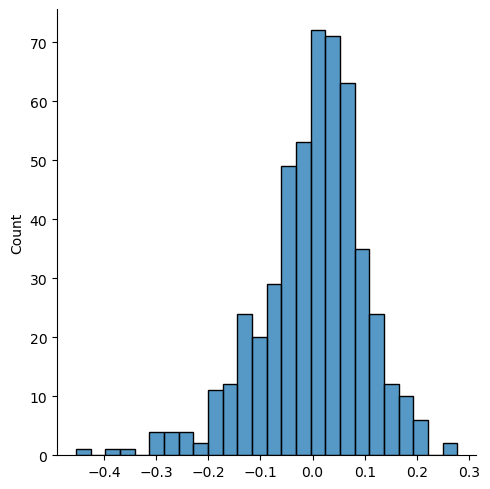

In [59]:
sns.displot(res)

### <font color=red>Observation => The distribution is centered around 0 and it is approximately normal= > hence Our <font color="green"> Assumption 2 "Error terms are normally Distributed with mean is passed"
    

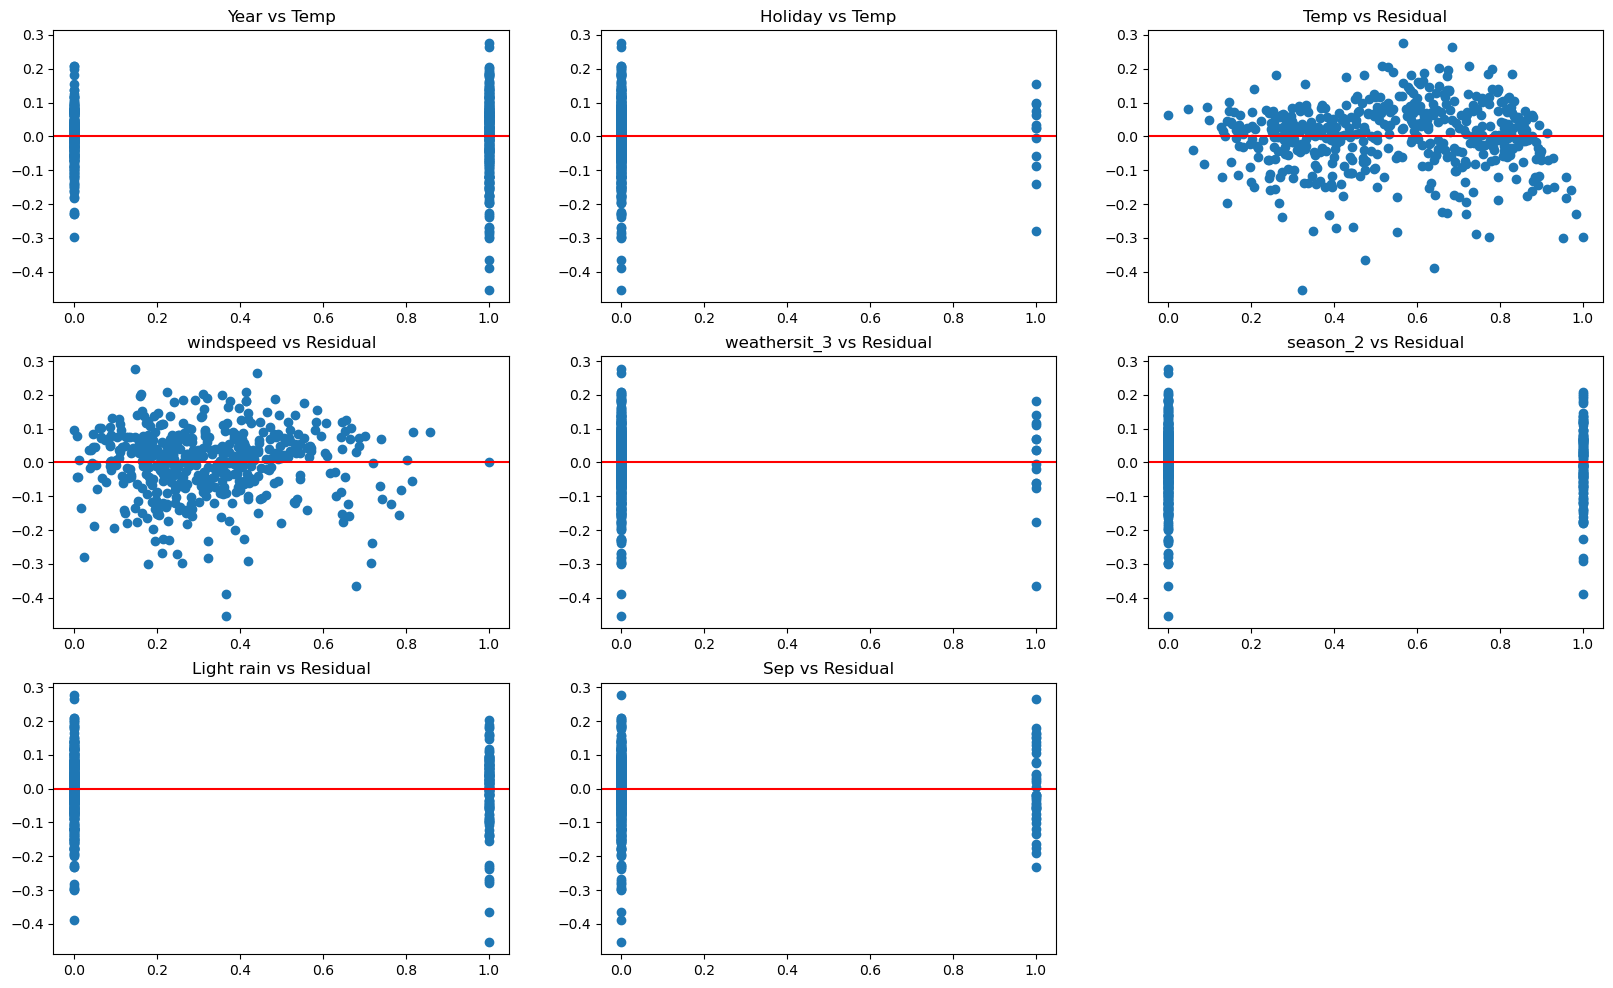

In [60]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['yr'],res)
plt.title("Year vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['holiday'],res)
plt.title("Holiday vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['temp'],res)
plt.title("Temp vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['windspeed'],res)
plt.title("windspeed vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_3'],res)
plt.title("weathersit_3 vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['season_2'],res)
plt.title("season_2 vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['season_4'],res)
plt.title("Light rain vs Residual")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,8)

plt.scatter(X_train['Sep'],res)
plt.title("Sep vs Residual")
plt.axhline(y=0, color='r', linestyle='-')


plt.show()

#### <font color="red">Observation=> As we see all the data points are centered around 0 So before making prediction we are certain that the model is reliable , Hence Moving ahead to making Predictions on test set, 

### Making Predictions

In [61]:
num_vars=["cnt","hum","windspeed","temp"]

df_test[num_vars]=scaler.transform(df_test[num_vars])

In [62]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,...,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.318182,0.027273,0.263636,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.466833,0.163248,0.441609,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test=df_test.pop("cnt")

In [64]:
X_test=df_test

In [65]:
X_test_sm=sm.add_constant(X_test)

In [66]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,weathersit_2,weathersit_3,season_2,...,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
184,1.0,0,1,0,0.831783,0.657364,0.084219,1,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,1,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,1,0,0,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [67]:
X_test_sm.drop(["season_3","hum","Oct","Aug",'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Feb', 'Mar',
       'Apr', 'May', 'June', 'July', 'Nov', 'Dec','workingday','weathersit_2','Saturday'],axis=1,inplace=True)

# columns Selected by Model During Training(['const', 'yr', 'holiday', 'temp', 'windspeed', 'weathersit_3','season_2', 'season_4', 'Sep'],



In [68]:
y_test_pred=lm_model.predict(X_test_sm)

In [69]:
#Evaluate the Model

r2_score(y_true=y_test,y_pred=y_test_pred)

# Training Model R2 is => 80.4% and Test Model R2 is 77.20%

0.77207319495548

### <font color="red"> Comparing R2 score of training set and R2 score of Test set , we can say that Training set is able to generalize well on Testing set

In [70]:
r2_score(y_test, y_test_pred)


0.77207319495548